# Importing neccessary Libraries

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline 
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, GridSearchCV
import warnings
import xgboost as xg

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
# pd.options.mode.use_inf_as_na = True

# Importing Dataset

In [3]:
titanic_train = pd.read_csv(r"C:\Users\Ayinoluwa\Downloads\Kaggle\Titanic\titanic\train.csv")
titanic_test = pd.read_csv(r"C:\Users\Ayinoluwa\Downloads\Kaggle\Titanic\titanic\test.csv")

# Exploratory Data Analysis

In [4]:
titanic_test.shape

(418, 11)

In [5]:
titanic_train.shape

(891, 12)

In [6]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
titanic_train_y = titanic_train['Survived']
titanic_train_X = titanic_train[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]

In [8]:
total_data = pd.concat([titanic_train_X, titanic_test])

In [9]:
total_data.shape

(1309, 11)

In [10]:
total_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
total_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [12]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [13]:
total_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [14]:
# Dropping the 'Cabin' column because it contains too many null values and the 'Ticket column'
total_data = total_data.drop(labels=["Cabin", "Ticket"], axis=1)

In [15]:
total_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [16]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1308 non-null   float64
 8   Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 102.3+ KB


In [17]:
total_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


<AxesSubplot:xlabel='Fare', ylabel='PassengerId'>

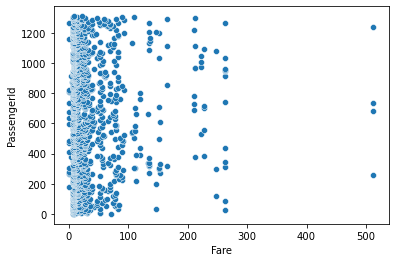

In [18]:
sns.scatterplot(x='Fare', y= 'PassengerId', data =total_data)

In [19]:
# Getting the 99 percentile of the 'Fare' column. This will be used to fill in for the outliers
uv = np.percentile(a=total_data['Fare'].dropna(), q=99)

In [20]:
# Replacing outliers with "uv"
total_data['Fare'][total_data['Fare'] > uv] = uv

<AxesSubplot:xlabel='Fare', ylabel='PassengerId'>

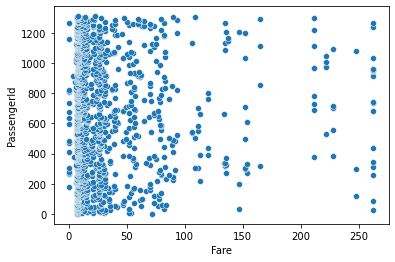

In [21]:
sns.scatterplot(x ='Fare', y='PassengerId', data = total_data)

In [22]:
# Filling the non value in 'Fare' column with the mean of the column
total_data['Fare'].fillna(total_data["Fare"].mean(), inplace= True)

<AxesSubplot:xlabel='Age', ylabel='PassengerId'>

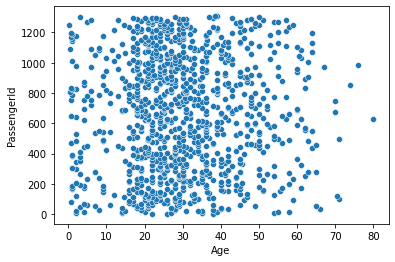

In [23]:
sns.scatterplot(x='Age', y='PassengerId', data=total_data)

In [24]:
# Getting the 99 percentile of the 'Age' column. This will be used to fill in for the outliers
age_uv = np.percentile(a=total_data['Age'].dropna(), q=99)

In [25]:
# Replacing outliers with "uv"
total_data['Age'][total_data['Age'] > age_uv] = age_uv

<AxesSubplot:xlabel='Age', ylabel='PassengerId'>

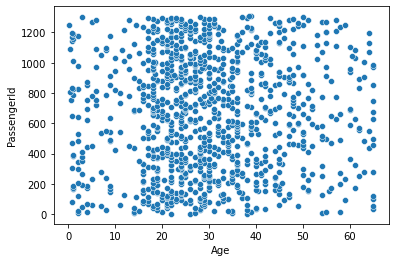

In [26]:
sns.scatterplot(x='Age', y='PassengerId', data=total_data)

In [27]:
# Filling the non values in 'Age' column with the mean of the column
total_data['Age'].fillna(total_data["Age"].mean(), inplace= True)

In [28]:
total_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [29]:
total_data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [30]:
total_data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [31]:
total_data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [32]:
total_data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6, 9], dtype=int64)

In [33]:
total_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [34]:
total_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [35]:
# Getting the categorical variables for 'Sex' and 'Embarked' column
cat_total_data = pd.get_dummies(data = total_data[['Sex', 'Embarked']])

In [36]:
cat_total_data.drop(axis=1, labels=['Sex_female'], inplace=True)

In [37]:
SibSp = pd.get_dummies(total_data['SibSp'], prefix='SibSp')

In [38]:
cat_total_data['Embarked_Q'].sum()

123

In [39]:
cat_total_data

,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,0,1
1,0,1,0,0
2,0,0,0,1
3,0,0,0,1
4,1,0,0,1
...,...,...,...,...
413,1,0,0,1
414,0,1,0,0
415,1,0,0,1
416,1,0,0,1


In [40]:
Pclass = pd.get_dummies(total_data['Pclass'], prefix='Pclass')

In [41]:
Parch = pd.get_dummies(total_data['Parch'], prefix='Parch')

In [42]:
Parch.columns

Index(['Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5',
       'Parch_6', 'Parch_9'],
      dtype='object')

In [43]:
Parch['Parch_6'].sum()

2

In [45]:
def feature_extraction(column: pd.DataFrame):
    new_column = column['Name'].to_list()
    you = []
    for x in new_column:
        me = x.split(',')[1].split('.')[0]
        you.append(me.strip())
    return pd.DataFrame(you, columns=['Name'])

In [46]:
Name = feature_extraction(total_data)

In [47]:
Cat_Name = pd.get_dummies(Name)

In [48]:
Cat_Name.columns

Index(['Name_Capt', 'Name_Col', 'Name_Don', 'Name_Dona', 'Name_Dr',
       'Name_Jonkheer', 'Name_Lady', 'Name_Major', 'Name_Master', 'Name_Miss',
       'Name_Mlle', 'Name_Mme', 'Name_Mr', 'Name_Mrs', 'Name_Ms', 'Name_Rev',
       'Name_Sir', 'Name_the Countess'],
      dtype='object')

In [49]:
Cat_Name.sum()

Name_Capt              1
Name_Col               4
Name_Don               1
Name_Dona              1
Name_Dr                8
Name_Jonkheer          1
Name_Lady              1
Name_Major             2
Name_Master           61
Name_Miss            260
Name_Mlle              2
Name_Mme               1
Name_Mr              757
Name_Mrs             197
Name_Ms                2
Name_Rev               8
Name_Sir               1
Name_the Countess      1
dtype: int64

In [50]:
# Cat_Name = Cat_Name[['Name_Dr', 'Name_Master', 'Name_Miss', 'Name_Mr', 'Name_Mrs','Name_Rev']]

In [51]:
categorical_total_data = pd.concat([cat_total_data, SibSp, Pclass, Parch], axis=1)

In [52]:
categorical_total_data = categorical_total_data.reset_index(drop=True)

In [53]:
categorical_total_data = pd.concat([Cat_Name, categorical_total_data], axis=1)

In [54]:
categorical_total_data.head()

,Name_Capt,Name_Col,Name_Don,Name_Dona,Name_Dr,Name_Jonkheer,Name_Lady,Name_Major,Name_Master,Name_Miss,Name_Mlle,Name_Mme,Name_Mr,Name_Mrs,Name_Ms,Name_Rev,Name_Sir,Name_the Countess,Sex_male,Embarked_C,Embarked_Q,Embarked_S,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Pclass_1,Pclass_2,Pclass_3,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


In [55]:
total_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [56]:
# total_data.drop(['Name', 'Sex', 'Embarked', 'Parch', 'SibSp', 'Pclass', 'Fare', 'Age'],axis=1, inplace=True)
total_data.drop(['Name', 'Sex', 'Embarked', 'Parch', 'SibSp', 'Pclass'],axis=1, inplace=True)

In [58]:
total_data = total_data.reset_index(drop=True)

In [59]:
total_data = pd.concat([total_data, categorical_total_data], axis=1)

In [60]:
totaL_data = pd.DataFrame(StandardScaler().fit_transform(total_data), columns=total_data.columns)

In [61]:
total_data.head()

,PassengerId,Age,Fare,Name_Capt,Name_Col,Name_Don,Name_Dona,Name_Dr,Name_Jonkheer,Name_Lady,Name_Major,Name_Master,Name_Miss,Name_Mlle,Name_Mme,Name_Mr,Name_Mrs,Name_Ms,Name_Rev,Name_Sir,Name_the Countess,Sex_male,Embarked_C,Embarked_Q,Embarked_S,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Pclass_1,Pclass_2,Pclass_3,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9
0,1,22.0,7.2500,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,2,38.0,71.2833,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,3,26.0,7.9250,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,4,35.0,53.1000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,5,35.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


In [62]:
total_data_training = total_data.iloc[0:891,:]
total_data_test = total_data.iloc[891:,:]

In [63]:
total_data_training_PassengerId = total_data_training.iloc[:,0]
total_data_training_X = total_data_training.iloc[:, 1:]

In [64]:
total_data_test_PassengerId = total_data_test.iloc[:,0]
total_data_test_X = total_data_test.iloc[:, 1:]

# Selecting Model and Model Hypertuning

In [65]:
model = RandomForestClassifier(random_state=1)

In [66]:
# Parameters for hypertuning the model
n_estimators=[int(x) for x in np.arange(50, 1000)]
max_depth=[int(x) for x in np.arange(10,120)]
min_samples_split=[int(x) for x in np.arange(1,10)]
min_samples_leaf=[int(x) for x in np.arange(1,5)]
max_features=['auto','sqrt']
bootstrap=[True,False]

In [67]:
%%capture
param_hypertune = RandomizedSearchCV(estimator=RandomForestClassifier(), 
                   param_distributions={'n_estimators':n_estimators, 'max_depth':max_depth, 'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf, 'max_features':max_features,'bootstrap':bootstrap},
                  random_state=42, cv=10, n_jobs=-1)

In [68]:
best_param = param_hypertune.fit(total_data_training_X, titanic_train_y)

In [69]:
best_param.best_params_['n_estimators']

172

# Fitting the Model

In [70]:
model = RandomForestClassifier(n_estimators=best_param.best_params_['n_estimators'], 
                               min_samples_split= best_param.best_params_['min_samples_split'],
                               min_samples_leaf= best_param.best_params_['min_samples_leaf'],
                               max_features=best_param.best_params_['max_features'],
                               max_depth=best_param.best_params_['max_depth'],
                               random_state=1)

In [71]:
titanic_train_y.shape

(891,)

In [72]:
model.fit(total_data_training_X, titanic_train_y)

RandomForestClassifier(max_depth=72, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=5, n_estimators=172, random_state=1)

# Testing Model

In [73]:
titanic_test_y = model.predict(total_data_test_X)

In [74]:
titanic_test_y = pd.DataFrame(titanic_test_y, columns=['Survived'])

In [75]:
final_submission = pd.concat([titanic_test_y, total_data_test_PassengerId.reset_index(drop=True)], axis=1)